In [2]:
import treecorr
import GCRCatalogs
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
%matplotlib inline

In [3]:
def nk_correlation(zlo, zhi):
    nk = treecorr.NKCorrelation(nbins=20, min_sep=(2.5/60)*(np.pi/180), max_sep=(100./60)*(np.pi/180))
    
    mask_redshift = (data['redshift']>zlo)*(data['redshift']<zhi) #the foreground shear?
    ra0 = data['ra'][mask_redshift]
    dec0 = data['dec'][mask_redshift]
    
    #restrict galaxies to the same octant where we have Kcmb data (in degrees)
    mask_N = (ra0>0)*(ra0<90)*(dec0<0)
    ra_N = ra0[mask_N]
    dec_N = dec0[mask_N]
    
    cat_N = treecorr.Catalog(ra=ra0, dec=dec0, ra_units='deg', dec_units='deg')
    
    nk.process(cat_N, cat_K)
    xi = nk.xi
    R = np.exp(nk.logr)
    return xi, R

In [4]:
filename = '/global/projecta/projectdirs/lsst/groups/CS/cosmoDC2/mass_sheets_behind_z3/cmb_maps/cmblensmap_total_gausshiz_masked.fits'

In [5]:
mapfile = hp.read_map(filename)
print(len(mapfile))

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
201326592


In [6]:
index = np.arange(201326592)

In [7]:
theta, phi = hp.pix2ang(nside=4096, ipix=index)
mask_kcmb = (phi>0)*(phi<np.pi/2)*(theta>np.pi/2)
print(True in mask_kcmb)

True


In [8]:
kcmb = mapfile[mask_kcmb]
ra_K = phi[mask_kcmb]
dec_K = np.pi/2-theta[mask_kcmb]
print(kcmb)

[ 0.00170215  0.09302823  0.09426145 ... -0.06422222 -0.12017739
 -0.09952184]


In [9]:
cat_K = treecorr.Catalog(ra=ra_K, dec=dec_K, k=kcmb, ra_units='rad', dec_units='rad')

In [10]:
gc = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_small')

In [11]:
data = gc.get_quantities(['ra', 'dec', 'redshift'], filters=['mag_r_lsst<28'])

In [13]:
redshift = np.linspace(0.5, 3, 6)

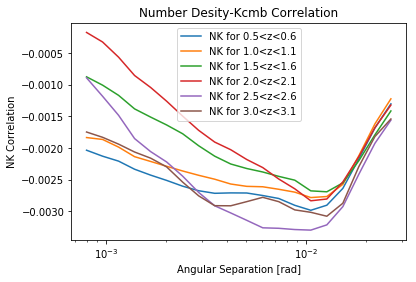

In [15]:
for z in redshift:  
    xi, R = nk_correlation(z, z+0.1)
    plt.semilogx(R, xi, label='NK for '+str(round(z,1))+'<z<'+str(round(z+0.1,1)))
plt.legend()
plt.xlabel('Angular Separation [rad]')
plt.ylabel('NK Correlation')
plt.title('Number Desity-Kcmb Correlation')
plt.savefig("NK_Correlation.png", dpi=200)
plt.show()

Text(0.5, 0.98, 'Galaxy Counts in Each Redshift Bin')

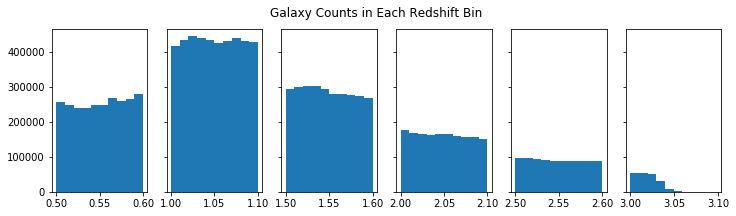

In [16]:
fig, axs = plt.subplots(1, 6, figsize=(12, 3), sharey=True)
for i in range(0, len(redshift)):
    mask = (data['redshift']>redshift[i])*(data['redshift']<redshift[i]+0.1)
    axs[i].hist(data['redshift'][mask])
fig.suptitle('Galaxy Counts in Each Redshift Bin')

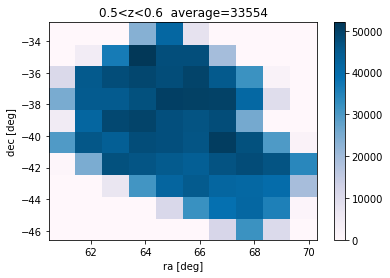

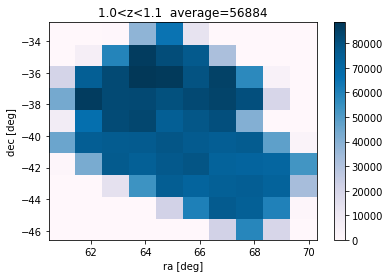

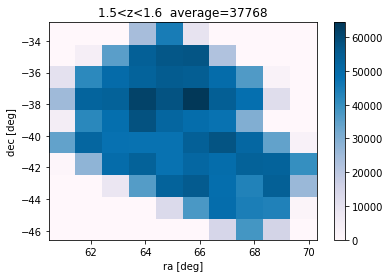

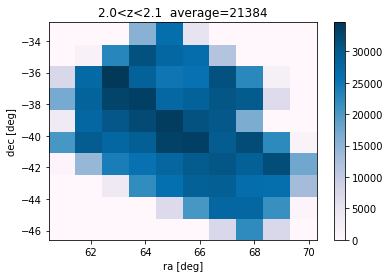

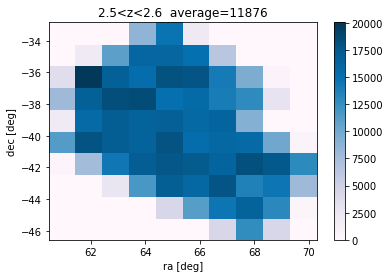

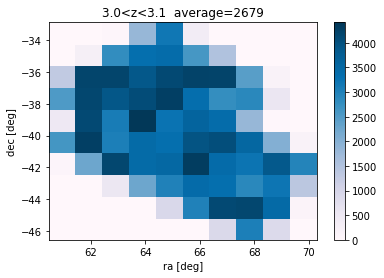

In [27]:
for i in range(0, len(redshift)):
    mask = (data['redshift']>redshift[i])*(data['redshift']<redshift[i]+0.1)
    plt.hist2d(data['ra'][mask], data['dec'][mask], cmap='PuBu')
    plt.colorbar()
    h, x, y = np.histogram2d(data['ra'][mask], data['dec'][mask])
    n = np.count_nonzero(h)
    plt.title(str(round(redshift[i],1))+"<z<"+str(round(redshift[i]+0.1, 1))+"  average="+str(round(float(np.sum(h))/n))) 
    plt.xlabel('ra [deg]')
    plt.ylabel('dec [deg]')
    plt.show()